In [24]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import explained_variance_score
from sklearn import cross_validation
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the feature array
feature_arr = pd.read_csv('../clean_data/reordered_social_feature.csv')

attract_y = feature_arr['attractive']
attract_y = attract_y.values

feature_x = feature_arr.drop(['attractive','unattractive'], axis=1)
x_fields = list(feature_x.columns.values)
feature_x = feature_x.values

In [8]:
# Run linear regression on 38 social features. 
itr_num = 50
test_corr_list = np.zeros((itr_num, 1))
coef_list = np.zeros((len(x_fields), itr_num))

for cur_itr in range(itr_num):
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(feature_x, attract_y, test_size=0.5)
    clf = linear_model.RidgeCV(alphas=np.logspace(-3, 1, num=20), fit_intercept=True)
    clf.fit(x_train, y_train) 
    
    coef_list[:, cur_itr] = clf.coef_
    
    y_test_pred = clf.predict(x_test)
    corr = spearmanr(y_test, y_test_pred)
    test_corr_list[cur_itr] = corr[0]

print '38 social features, prediction results', test_corr_list.mean()

38 social features, prediction results 0.816456683794


In [21]:
# Now delete each social feature one by one, see how that affect the final predictions results
short_list_error = np.zeros((feature_x.shape[1], 1))
itr_num = 50
for cur_delete_ind in range(feature_x.shape[1]):
    
    short_feature = np.delete(feature_x, [cur_delete_ind], axis=1)
    tep_test_corr_list = np.zeros((itr_num, 1))
    
    for cur_itr in range(itr_num):
        x_train, x_test, y_train, y_test = cross_validation.train_test_split(short_feature, attract_y, test_size=0.5)
        clf = linear_model.RidgeCV(alphas=np.logspace(-3, 1, num=20))
        clf.fit(x_train, y_train) 

        y_test_pred = clf.predict(x_test)
        corr = spearmanr(y_test, y_test_pred)
        tep_test_corr_list[cur_itr] = corr[0]
    
    short_list_error[cur_delete_ind] = tep_test_corr_list.mean()

In [27]:
# Now run pca on social features, see how many pcs are necessary. 
pca = PCA()
pca_feature = pca.fit_transform(feature_x)

In [42]:
total_feature_num = feature_x.shape[1]
pca_error = np.zeros((feature_x.shape[1], 1))
itr_num = 50

for cur_keep_ind in range(total_feature_num):
    print 'cur_feature_num', (cur_keep_ind+1)
    cur_feature = pca_feature[:, :cur_keep_ind+1]    
    tep_test_corr_list = np.zeros((itr_num, 1))
    
    for cur_itr in range(itr_num):
        x_train, x_test, y_train, y_test = cross_validation.train_test_split(cur_feature, attract_y, test_size=0.5)
        clf = linear_model.RidgeCV(alphas=np.logspace(-3, 1, num=20))
        clf.fit(x_train, y_train) 

        y_test_pred = clf.predict(x_test)
        corr = spearmanr(y_test, y_test_pred)
        tep_test_corr_list[cur_itr] = corr[0]
    
    pca_error[cur_keep_ind] = tep_test_corr_list.mean()    

cur_feature_num 1
cur_feature_num 2
cur_feature_num 3
cur_feature_num 4
cur_feature_num 5
cur_feature_num 6
cur_feature_num 7
cur_feature_num 8
cur_feature_num 9
cur_feature_num 10
cur_feature_num 11
cur_feature_num 12
cur_feature_num 13
cur_feature_num 14
cur_feature_num 15
cur_feature_num 16
cur_feature_num 17
cur_feature_num 18
cur_feature_num 19
cur_feature_num 20
cur_feature_num 21
cur_feature_num 22
cur_feature_num 23
cur_feature_num 24
cur_feature_num 25
cur_feature_num 26
cur_feature_num 27
cur_feature_num 28
cur_feature_num 29
cur_feature_num 30
cur_feature_num 31
cur_feature_num 32
cur_feature_num 33
cur_feature_num 34
cur_feature_num 35
cur_feature_num 36
cur_feature_num 37
cur_feature_num 38


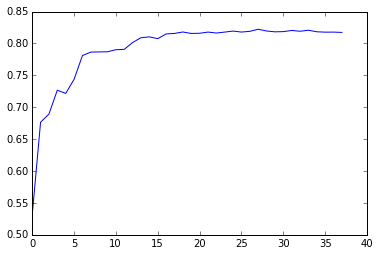

In [43]:
plt.plot(np.arange(total_feature_num), pca_error)

In [39]:
pca1 = pca_feature[:, 0]

In [45]:
spearmanr(pca_feature[:, 1], attract_y)

SpearmanrResult(correlation=-0.39628576673915444, pvalue=6.7911137221820871e-84)